In [12]:
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline  

In [5]:
# Read in data from a csv file
df = pd.read_csv('yellow_nyc_taxi_january_2016.csv')

In [34]:
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,0,2,2016-01-01 00:00:00,2016-01-01 00:00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8
1,1,2,2016-01-01 00:00:00,2016-01-01 00:00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3
2,2,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3
3,3,2,2016-01-01 00:00:00,2016-01-01 00:00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3
4,4,2,2016-01-01 00:00:00,2016-01-01 00:00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8


In [22]:
print('Rows of data: ', df.shape)

Rows of data:  (8315540, 20)


In [16]:
df.columns

Index(['Unnamed: 0', 'VendorID', 'tpep_pickup_datetime',
       'tpep_dropoff_datetime', 'passenger_count', 'trip_distance',
       'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

## Plot histogram for categorical variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2467b23940>]], dtype=object)

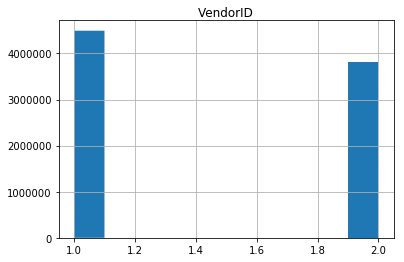

In [15]:
df.hist(column='VendorID')

Sometimes some values are so infrequent that it's best to leave them out of the visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24507afac8>]], dtype=object)

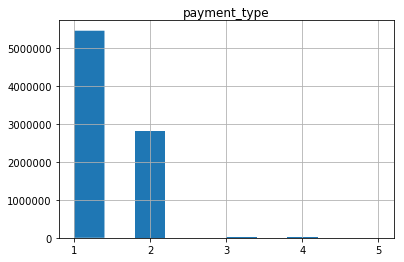

In [17]:
df.hist(column='payment_type')

In [31]:
df['payment_type'].value_counts()

1    5454354
2    2816308
3      33337
4      11540
5          1
Name: payment_type, dtype: int64

99.46031165745099


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24504720f0>]], dtype=object)

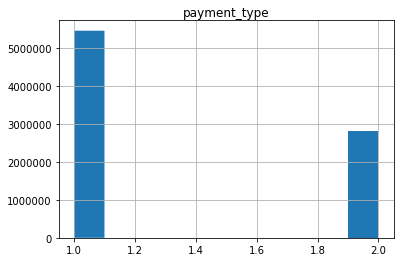

In [33]:
mask = df['payment_type'].isin([1,2])

print(100 * df[mask].shape[0] / df.shape[0])

df[mask].hist(column='payment_type')

## Continuous variables

We can also create histograms for continous variables. In this case, it's best to split the values into bins, in effect, discretizing the number of values the variable can take on.

Here, we bin the fare_amount into 10 bins.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f245071fd30>]], dtype=object)

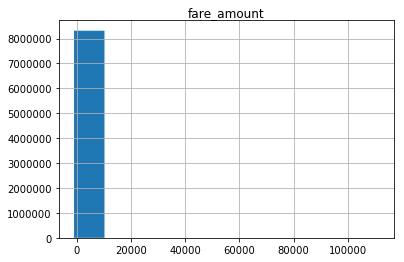

In [23]:
df.hist(column='fare_amount', bins=10)

Does something look off in the above histogram? The column fare_amount has some nonsensical values that are probably mistakes. We can view some summary statistics of the column by calling the `.describe()` method.

In [24]:
df['fare_amount'].describe()

count    8.315540e+06
mean     1.254496e+01
std      4.018313e+01
min     -9.576000e+02
25%      6.500000e+00
50%      9.000000e+00
75%      1.400000e+01
max      1.112709e+05
Name: fare_amount, dtype: float64

We should filter out any trips where the fare_amount value is negative.

However, the upper bound is a bit more troublesome. It helps to plot a few histograms and also to look at what percentage of the data we keep by setting different upper bounds.

Let's try to limit ourselves to trips where fare_amount is between \$0 and \$300.

99.96398309670809


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f245068ecf8>]], dtype=object)

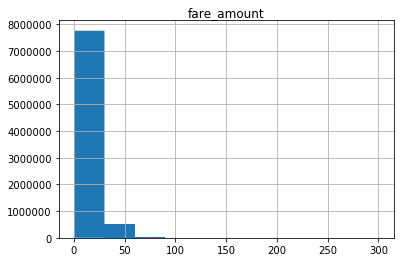

In [28]:
mask = (df['fare_amount'] >= 0) & (df['fare_amount'] <= 300)

print(100 * df[mask].shape[0] / df.shape[0])

df.loc[mask].hist(column='fare_amount')

Still doesn't look right. Let's try between \$0 and \$100.

99.90819598005662


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24505c0390>]], dtype=object)

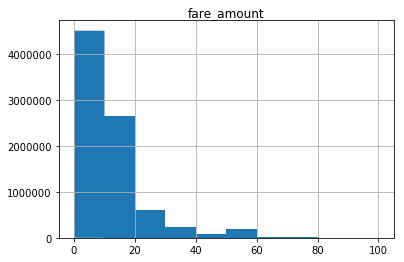

In [29]:
mask = (df['fare_amount'] >= 0) & (df['fare_amount'] <= 100)

print(100 * df[mask].shape[0] / df.shape[0])

df.loc[mask].hist(column='fare_amount')

Better. But I think it's still skewed. And we still have most of the data. Let's try between \$0 and \$80.

99.86240220117996


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24505b9be0>]], dtype=object)

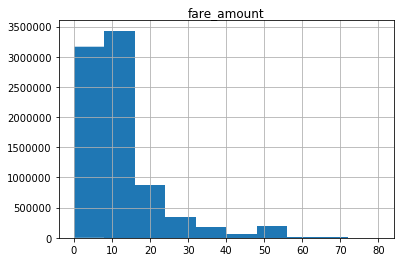

In [30]:
mask = (df['fare_amount'] >= 0) & (df['fare_amount'] <= 80)

print(100 * df[mask].shape[0] / df.shape[0])

df.loc[mask].hist(column='fare_amount')

93.55709911803683


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f24500cf0f0>]], dtype=object)

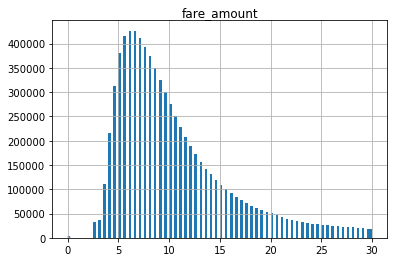

In [48]:
mask = (df['fare_amount'] >= 0) & (df['fare_amount'] <= 30)

print(100 * df[mask].shape[0] / df.shape[0])

df[mask].hist(column='fare_amount', bins=120)

This histogram looks best. Aside from the built in `.hist()` method, you can also bin continous data using the `numpy.linspace` and `pandas.cut` methods. Try to figure out how.